# Illustrating PCA
This notebook shows the effect of principal component analysis when applied to a two dimensional normal distribution.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
from scipy import integrate
from sklearn.decomposition import PCA
from __future__ import division


In [2]:
##################################################
###############Without correlation################
##################################################
Nsize=1000
#Covariance
cv=0
xuncor, yuncor = np.random.multivariate_normal([0,0], [[1, cv], [cv, 1]] , Nsize).T
X=np.zeros([2,Nsize])

#Computing the averages
xmean=np.mean(xuncor)
ymean=np.mean(yuncor)

#Subtracting the average for each row
X[0,:]=xuncor-np.ones([1,Nsize])*xmean
X[1,:]=yuncor-np.ones([1,Nsize])*ymean

#Computing the 2x2 covariane matrix
cov = np.cov(X)

#Diagonalize the covariance matrix
eigvals,eigvecs = np.linalg.eig(cov)

#Sorting by largest eigenvalues
idx = eigvals.argsort()[::-1]   
eigenValuesuncor = eigvals[idx]
eigenVectorsuncor = eigvecs[:,idx]

##################################################
################With correlation##################
##################################################

Nsize=1000
#Covariance
cv=0.9
xcor, ycor = np.random.multivariate_normal([0,0], [[1, cv], [cv, 1]] , Nsize).T
X=np.zeros([2,Nsize])

#Computing the averages
xmean=np.mean(xcor)
ymean=np.mean(ycor)

#Subtracting the average for each row
X[0,:]=xcor-np.ones([1,Nsize])*xmean
X[1,:]=ycor-np.ones([1,Nsize])*ymean

#Computing the 2x2 covariane matrix
cov = np.cov(X)

#Diagonalize the covariance matrix
eigvals,eigvecs = np.linalg.eig(cov)

#Sorting by largest eigenvalues
idx = eigvals.argsort()[::-1]   
eigenValuescor = eigvals[idx]
eigenVectorscor = eigvecs[:,idx]


PCA applied to a two dimensional normal distribution with non zero variance, allows to detect the axis along the data has the highest variance.

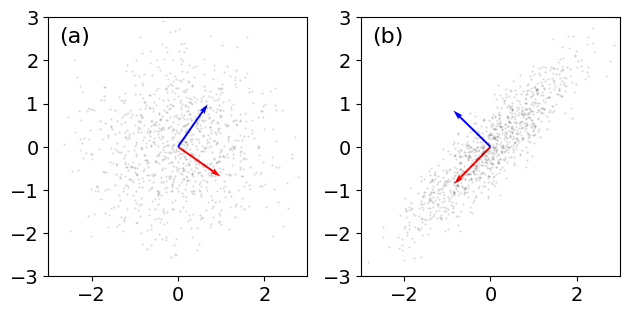

In [5]:
origin = np.array([[0, 0],[0, 0]])

fig, axs = plt.subplots(1, 2)
axs[0].plot(xuncor,yuncor,'k.',markersize=1,alpha=0.15)
axs[0].set_xlim([-3,3])
axs[0].set_ylim([-3,3])
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].tick_params(axis='both', which='minor', labelsize=12)
axs[0].set_aspect('equal')
axs[0].text(-2.75, 2.4, "(a)",fontsize=16)
axs[0].quiver(*origin,eigenVectorsuncor[:,0], eigenVectorsuncor[:,1], color=['r','b'], scale=5,linewidth=2)

axs[1].plot(xcor,ycor,'k.',markersize=1,alpha=0.15)
axs[1].set_xlim([-3,3])
axs[1].set_ylim([-3,3])
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].tick_params(axis='both', which='minor', labelsize=12)
axs[1].set_aspect('equal')
axs[1].text(-2.75, 2.4, "(b)",fontsize=16)
axs[1].quiver(*origin,eigenVectorscor[0,:], eigenVectorscor[1,:], color=['r','b'], scale=5,linewidth=2)
plt.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1)
fig.tight_layout()
fig.savefig('PCAexample.png', format='png',dpi=600,bbox_inches='tight')